<div id="Projeto 2"></div>

## Projeto 2


<div id="Projeto 2"></div>

## 1 ) INTRODUÇÃO: 
 
        Todos nós gostamos de jogar nosso amado jogo de futebol dentro e fora do campo. FIFA é um jogo de futebol que é jogado por muitas pessoas 
        em todo o mundo e que tem muitas edições. Seu último lançamento foi em outubro deste ano, ou seja, FIFA 2021. Este conjunto de dados contém 
        os dados dos jogadores em jogo.

        O conjunto de dados contém dados de classificação dos jogadores, sua idade, nacionalidade, a posição que eles jogam e seu potencial de 
        crescimento no jogo. Os dados de alguns jogadores e seus clubes podem não ser muito precisos, pois a janela de transferência ainda está 
        aberta e alterações podem ser feitas em fases posteriores.

        Mais detalhadamente temos em nossos dados:

                -Name: Nome do jogador
                -Nationality: Nacionalidade do jogador
                -Position: Posição em que o jogador joga
                -Overall: Classificação geral do jogador // Nota 
                -Age: Idade do jogador
                -Hits: Sucesso do jogador
                -Potencial: Potencial de crescimento do jogador em uma partida
                -Team: O time pelo qual o jogador joga
        
        Dessa maneira faremos com que atráves de algumas características de um jogador seja possível prever o seu Overall. Pretendemos que isso seja 
        feito através dos seguintes tópicos:
        
                -Mineração dos dados: Relação entre as variáveis explorada
                -Modelagem: Feito as etapas onde a predição é implementada
                -Validação: Validção do modelo através de medidas de performance
                -Conclusão e referências.




                                                                        Obs: O conjunto de dados foi retirado de fifaindex.com. Todos os créditos a eles pelos dados.

<div id="Projeto 2"></div>

## 2 ) MINERANDO DADOS:


In [1]:
# Importando bibliotecas que serão utilizadas no decorrer do projeto

import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import cm
from IPython.display import clear_output

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\OneDrive\Documentos\Insper\Ciencia_dos_dados\Meu\Projeto_2\Projeto-2-CienciaDosDados


In [3]:
# Carregando a base de dados que será utilizada no treinamento

dados = pd.read_excel("FIFA-21-TREINAMENTO.xlsx")

In [4]:
dados_teste = pd.read_excel("FIFA-21-TESTE.xlsx")

`A variável dados será a responsável por representar a nossa BASE DE DADOS`

In [5]:
# Dividindo os "PAÍSES em que os personagens nasceram" em "CONTINENTES em que os personagens nasceram" 

SouthAmerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'] 

Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', "Congo", 'DR Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome', 'Principe', 'Senegal', 'Seychelles', 'Sierra', 'Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe','Ivory Coast', "Sierra Leone", "Guinea Bissau"]

Asia = ['Afghanistan', 'Ermenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China PR', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', "Korea Republic", 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Mongolia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

NorthAmerica =  ['Canada', 'Mexico', 'United States',"Costa Rica","Jamaica", "Dominican Republic", "Cuba", "Haiti", "Nicaragua"]

Europe = ['Albania','Andorra','Austria','Belarus','Belgium','Bosnia & Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','England','Finland','France','Germany','Greece','Hungary','Iceland','Republic of Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine',"Scotland","Wales","lbania","Northern Ireland"]

Oceania = ["Australia", "New Zealand"]


In [6]:
# Inicializando a Serie "Continent"

dados["Continent"] = "Indefinido"

In [7]:
# Classificando os personagens por continente no qual nasceu:

for n,elem in enumerate(NorthAmerica):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "NorthAmerica"

for n,elem in enumerate(SouthAmerica):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "SouthAmerica"

for n,elem in enumerate(Europe):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "Europe"

for n,elem in enumerate(Africa):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "Africa"

for n,elem in enumerate(Asia):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "Asia"

for n,elem in enumerate(Oceania):

    for i,e in enumerate(dados.nationality):
        
        if e == elem:
            dados.iloc[i,9] = "Oceania"

In [8]:
# Código responsável por analisar quais são os países presentes na Serie "Continent" que são "Indefinidos"

linhasindefinidas = dados.Continent == "Indefinido" 

dados.loc[linhasindefinidas, :]

,player_id,name,nationality,position,overall,age,hits,potential,team,Continent
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indefinido
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indefinido
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indefinido
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indefinido
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indefinido
...,...,...,...,...,...,...,...,...,...,...
16374,194248.0,Ryang Yong Gi,Korea DPR,LM|CAM|CF,60.0,38.0,0.0,60.0,Sagan Tosu,Indefinido
16885,230935.0,Zeus de la Paz,Curacao,GK,59.0,25.0,0.0,65.0,Oldham Athletic,Indefinido
17065,254581.0,Alvin Jones,Trinidad & Tobago,RB,58.0,26.0,1.0,63.0,Real Salt Lake,Indefinido
17603,253390.0,Douglas Martínez,Honduras,ST,57.0,23.0,0.0,63.0,Real Salt Lake,Indefinido


In [9]:
#Limpando o dataset para melhorar o desempenho de nosso projeto:
    # Eliminando alguns outliners que fariam que o projeto levasse em consideração EXCEÇÕES

# filtro de linhas para idade, potencial, hits e overall
filtro_geral = (dados.age < 40) & (dados.potential < 90) & (dados.hits < 100) & (dados.overall < 90)

# filtro de linhas para idade, potencial, hits e overall, agora para o teste
filtro_geral_teste = (dados_teste.age < 40) & (dados_teste.potential < 90) & (dados_teste.hits < 100) & (dados_teste.overall < 90)

In [10]:
dados = dados.loc[filtro_geral,:] #realizando a limpeza e atualizando o DF

dados_teste = dados_teste.loc[filtro_geral_teste,:] #realizando a limpeza e atualizando o DF

<div id="Projeto 2"></div>

## Início da análise exploratória:

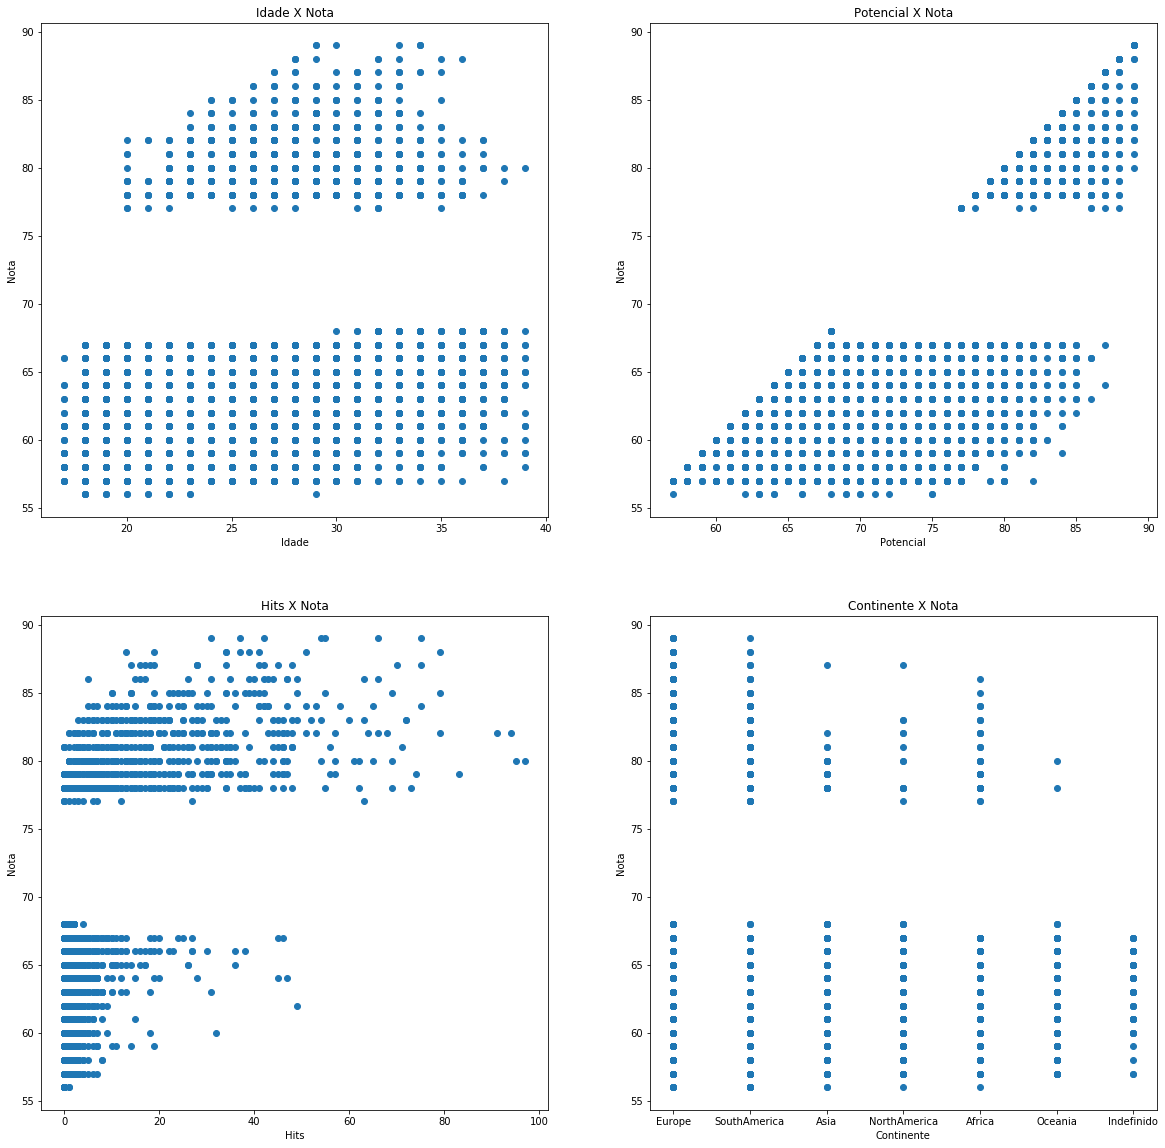

In [11]:
# Realizando o início de uma análise exploratória analisando gráficos de dispersão e percebendo a relação entre a TARGET e algumas FEATURES

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(dados.age, dados.overall)
plt.title("Idade X Nota")
plt.xlabel("Idade")
plt.ylabel("Nota")

plt.subplot(2, 2, 2)
plt.scatter(dados.potential, dados.overall)
plt.title("Potencial X Nota")
plt.xlabel("Potencial")
plt.ylabel("Nota")

plt.subplot(2, 2, 3)
plt.scatter(dados.hits, dados.overall)
plt.title("Hits X Nota")
plt.xlabel("Hits")
plt.ylabel("Nota")

plt.subplot(2, 2, 4)
plt.scatter(dados.Continent, dados.overall)
plt.title("Continente X Nota")
plt.xlabel("Continente")
plt.ylabel("Nota")

plt.show()

`Tendo em vista os gráficos de dispersão plotados acima, percebemos que:

    - Talvez Idade X Nota tenha uma relação semelhante a uma "parábola" em que seu pico seja aproximadamente para uma idade de 32 anos

    - A relação entre Potential e Nota tende a algo quase linear e essa relação pode vir a ser a de maior correlação entre Target´s e 
    Features, sendo portanto uma das variáveis a se prestar mais atenção

    - Também, talvez Hits X Nota tenha uma relação semelhante a uma "parábola" ou a um "polinômio" devido sua dispersão nos dados
    
    - E difilcilmente conseguimos tirar conclusões sobre o Continente de onde o jogador nasceu e sua Nota apenas por esse gráfico`


In [12]:
# Analisando a correlação e a covariância entre "Idade" e "Overall"

corr_idade_nota = dados.age.corr(dados.overall)
cov_idade_nota = dados.age.cov(dados.overall)
print("Correlação entre idade e nota: {0}".format(corr_idade_nota))
print("Covariância entre idade e nota: {0}".format(cov_idade_nota))

Correlação entre idade e nota: 0.33885772498299405
Covariância entre idade e nota: 8.827046866334117


In [13]:
# Analisando a correlação e a covariância entre "Potencial" e "Overall"

corr_potencial_nota = dados.potential.corr(dados.overall)
cov_potencial_nota = dados.potential.cov(dados.overall)
print("Correlação entre potencial e nota: {0}".format(corr_potencial_nota))
print("Covariância entre potencial e nota: {0}".format(cov_potencial_nota))

Correlação entre potencial e nota: 0.5813150061487811
Covariância entre potencial e nota: 20.673361462503625


In [14]:
# Analisando a correlação e a covariância entre "Hits" e "Overall"

corr_hits_nota = dados.hits.corr(dados.overall)
cov_hits_nota = dados.hits.cov(dados.overall)
print("Correlação entre hits e nota: {0}".format(corr_hits_nota))
print("Covariância entre hits e nota: {0}".format(cov_hits_nota))

Correlação entre hits e nota: 0.6024331939639708
Covariância entre hits e nota: 24.66184661116018


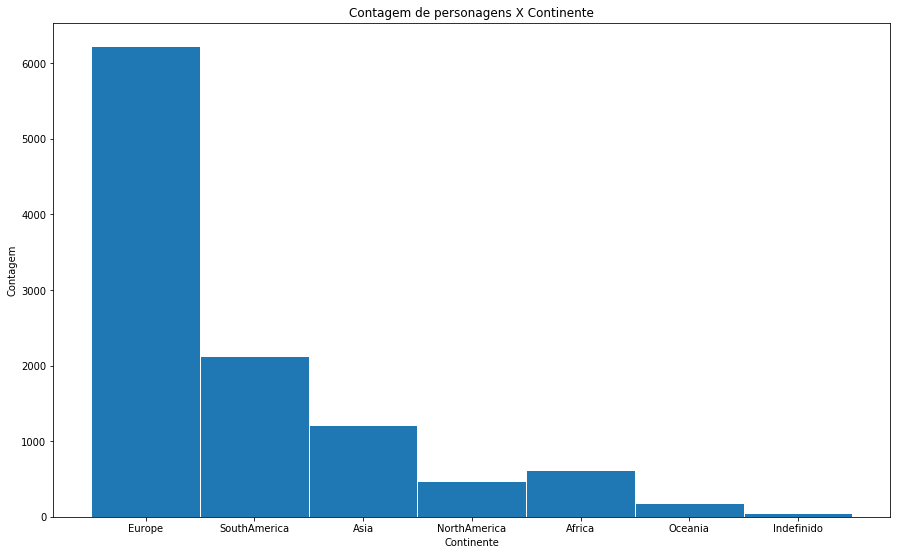

In [15]:
# Analisando histograma no qual exibimos a contagem da quantidade de personagens em cada continente

plt.figure(figsize=(15,20))

plt.subplot(2,1,2)
plt.hist(dados.Continent, edgecolor = "white", bins=[0,1,2,3,4,5,6,7],align="left")
plt.title("Contagem de personagens X Continente")
plt.xlabel("Continente")
plt.ylabel("Contagem")

plt.show()

`Assim podemos chegar na conclusão de que alguns continentes terão maior "influência" em nosso projeto, pois estes têm maior número de jogadores`

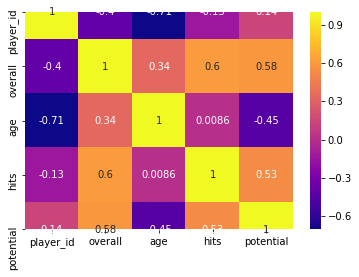

In [16]:
# Mais uma análise que permite explorar as correlações entre variáveis da base de dados, dessa vez através de um "mapa de calor"

sns.heatmap(dados.corr(), annot=True, cmap="plasma", linecolor="gray");

`Graças as análises sobre as correlações temos a percepção de que as variáveis que mais tem "poder" para modelar a nossa Target Overall com menos erros possívei seriam as variáveis:`

        -Age
        -Hits
        -E Potential

In [17]:
# Código responsável por iniciar uma nova análise relativa a idade

#  A ideia aqui presente é possibilitar a interpretação de qual seria um "Overall" médio para determinadas faixas de idade

lista_17 = []
lista_21 = []
lista_25 = []
lista_29 = []
lista_33 = []
lista_37 = []
lista_41 = []

for num, idade in enumerate(dados.age):

    if idade <= 17:
        lista_17.append(dados.iloc[num,4])
    
    elif idade <= 21:
        lista_21.append(dados.iloc[num,4])
    
    elif idade <= 25:
        lista_25.append(dados.iloc[num,4])

    elif idade <= 29:
        lista_29.append(dados.iloc[num,4])

    elif idade <= 33:
        lista_33.append(dados.iloc[num,4])

    elif idade <= 37:
        lista_37.append(dados.iloc[num,4])

    elif idade <= 41:
        lista_41.append(dados.iloc[num,4])

In [18]:
# Média do "Overall" sendo cálculada

media_idades = [np.mean(lista_17), np.mean(lista_21), np.mean(lista_25), np.mean(lista_29), np.mean(lista_33), np.mean(lista_37), np.mean(lista_41)]

idadis = [17, 21, 25, 29, 33, 37, 41]

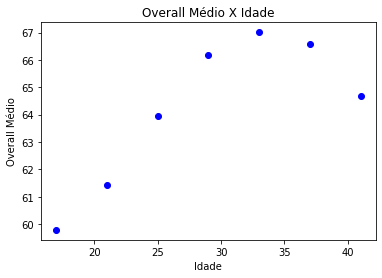

In [19]:
# Término da análise proposta com plotagem de gráfico( Overall Médio X Idade )

plt.plot(idadis, media_idades, "ob")
plt.title("Overall Médio X Idade")
plt.xlabel("Idade")
plt.ylabel("Overall Médio")
plt.show()

Confirmamos com o gráfico Overall Médio X Idade que:

    - Idade X Nota tem uma relação semelhante a uma "parábola" em que seu pico seja aproximadamente para uma idade de 32 anos

<div id="Projeto 2"></div>

## Fim da análise exploratória e começo da implementação das Regressões

        Podemos através da Análise feita concluir que os dados ,de forma geral, se apresentam em forma de nuvem, acarretando correlações que dificilmente ultrapassam
        o valor 0.6. É notório, também, que a idade dos personagens se relaciona com o Overall através de uma espécie de curva, o que se confirma no gráfico(Overall
        Médio X Idade) 

        Pretendesse analisar as variáveis dependentes Potencial, Idade e Hits, para predizer a variável independente Overall, através da regressão Polinomial
        

<div id="Projeto 2"></div>

## 3 ) MODELOS DE PREDIÇÃO:

<div id="Projeto 2"></div>

## Polynomial regression: extending linear models with basis functions:  
        Essa abordagem foi escolhida pois mantém o desempenho geralmente rápido dos métodos lineares, enquanto permite
        que eles se ajustem a uma gama muito mais ampla de dados. Através dessa abordagem faremos 4 modelos e analisaremos
        qual deles melhora satisfaz nosso OBJETIVO.



##### Porém, antes de iniciar vamos ver o que fazem os dois modelos de predição que serão usados adiante

<div id="Projeto 2"></div>

### Regressão Linear Múltipla:  
     Regressão múltipla é uma coleção de técnicas estatísticas para construir modelos que descrevem de maneira razoável               relações entre várias variáveis explicativas de um determinado processo. A diferença entre a regressão linear                   simples e a múltipla é que na múltipla são tratadas duas ou mais variáveis explicativas.


<div id="Projeto 2"></div>

### Regressão Polinomial:  
    O objetivo desse modelo é poder desenvolver uma técnica geral que funciona bem para problemas de relações não lineares.
    Como é possivel aproximar qualquer função com um polinômio, então é possivel extender a regressão linear para regressão         polinomial. 
    Assim, a partir das variáveis existentes, nós vamos construindo novas variáveis polinomiais e a regressão com elas terá         mais capacidade quanto maior o grau do polinômio criado.
        
        

<div id="Projeto 2"></div>

## MODELO 1
Prediction feita usando somente a variável dependente "Idade"

In [20]:
pre_process1 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X1 = dados.age.to_numpy().reshape(len(dados.age.to_numpy()), 1) 
Y1 = dados.overall.to_numpy().reshape(len(dados.age.to_numpy()), 1) 

X_poly1 = pre_process1.fit_transform(X1) #Transforma nossa variável dependente

X_poly1

array([[1.00000000e+00, 2.90000000e+01, 8.41000000e+02, ...,
        2.05111490e+07, 5.94823321e+08, 1.72498763e+10],
       [1.00000000e+00, 2.90000000e+01, 8.41000000e+02, ...,
        2.05111490e+07, 5.94823321e+08, 1.72498763e+10],
       [1.00000000e+00, 3.00000000e+01, 9.00000000e+02, ...,
        2.43000000e+07, 7.29000000e+08, 2.18700000e+10],
       ...,
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, ...,
        1.88956800e+06, 3.40122240e+07, 6.12220032e+08],
       [1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        5.15363200e+06, 1.13379904e+08, 2.49435789e+09],
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, ...,
        1.88956800e+06, 3.40122240e+07, 6.12220032e+08]])

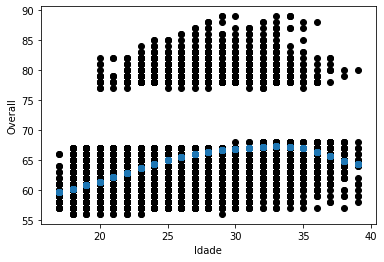

In [21]:
# Implememntando a Polynommial Regression

pr_model1 = LinearRegression()

pr_model1.fit(X_poly1, Y1) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred1 = pr_model1.predict(X_poly1) # Guardando nosso OVERALL em uma nova variável "Y"

# Plotando nosso modelo em nossos dados
plt.scatter(X1, Y1, c="black")
plt.xlabel("Idade")
plt.ylabel("Overall")
plt.scatter(X1, y_pred1)

In [22]:
# Avaliando o nosso modelo através de um root mean square

erro1 = (mean_squared_error(Y1, y_pred1))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²)

Y1_m = [Y1.mean()]*len(Y1)

r_quadrado1 = 1 - (mean_squared_error(Y1, y_pred1) / mean_squared_error(Y1, Y1_m))

print("Temos um RootMeanSquare de Treinamento nesse modelo 1 que vale: {0:.5}%".format(erro1))
print("Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 1 que vale: {0:.5}".format(r_quadrado1))

Temos um RootMeanSquare de Treinamento nesse modelo 1 que vale: 5.298%
Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 1 que vale: 0.13742


In [23]:
pre_process1 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X1_teste = dados_teste.age.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 
Y1_teste = dados_teste.overall.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 

X_poly1_teste = pre_process1.fit_transform(X1_teste) #Transforma nossa variável dependente

# Implememntando a Plynommial Regression

pr_model1 = LinearRegression()

pr_model1.fit(X_poly1_teste, Y1_teste) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred1_teste = pr_model1.predict(X_poly1_teste) # Guardando nosso OVERALL em uma nova variável "Y"

In [24]:
# Avaliando o nosso modelo através de um root mean square, no teste

erro1_teste = (mean_squared_error(Y1_teste, y_pred1_teste))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²), no teste

Y1_m_teste = [Y1_teste.mean()]*len(Y1_teste)

r_quadrado_teste = 1 - (mean_squared_error(Y1_teste, y_pred1_teste) / mean_squared_error(Y1_teste, Y1_m_teste))

print("Temos um RootMeanSquare de Teste nesse modelo final que vale: {0:.5}%".format(erro1_teste))
print("Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: {0:.5}".format(r_quadrado_teste))

Temos um RootMeanSquare de Teste nesse modelo final que vale: 2.6256%
Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: 0.0079079


<div id="Projeto 2"></div> 

## Logo temos os seguintes dados:

                                        Treinamento     Teste

        Erro(RMS):                        5.34331%      2.6256%

        Coef De determinação(R²):         0.16162       0.0079082

Sendo, portanto, a predição não muito semelhante em Teste e Treinamento no modelo 1


<div id="Projeto 2"></div>

## MODELO 2
Prediction feita usando somente a variável dependente "Potential"


In [25]:
pre_process2 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X2 = dados.potential.to_numpy().reshape(len(dados.potential.to_numpy()), 1) 
Y2 = dados.overall.to_numpy().reshape(len(dados.potential.to_numpy()), 1) 

X_poly2 = pre_process2.fit_transform(X2) #Transforma nossa variável dependente

X_poly2

array([[1.00000000e+00, 8.90000000e+01, 7.92100000e+03, ...,
        5.58405945e+09, 4.96981291e+11, 4.42313349e+13],
       [1.00000000e+00, 8.90000000e+01, 7.92100000e+03, ...,
        5.58405945e+09, 4.96981291e+11, 4.42313349e+13],
       [1.00000000e+00, 8.90000000e+01, 7.92100000e+03, ...,
        5.58405945e+09, 4.96981291e+11, 4.42313349e+13],
       ...,
       [1.00000000e+00, 6.80000000e+01, 4.62400000e+03, ...,
        1.45393357e+09, 9.88674826e+10, 6.72298882e+12],
       [1.00000000e+00, 6.20000000e+01, 3.84400000e+03, ...,
        9.16132832e+08, 5.68002356e+10, 3.52161461e+12],
       [1.00000000e+00, 6.90000000e+01, 4.76100000e+03, ...,
        1.56403135e+09, 1.07918163e+11, 7.44635325e+12]])

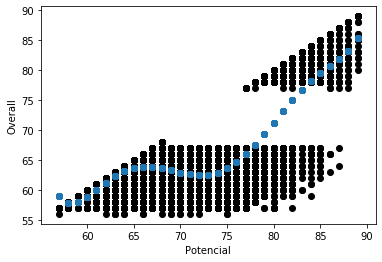

In [26]:
# Implememntando a Plynommial Regression

pr_model2 = LinearRegression()

pr_model2.fit(X_poly2, Y2) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred2 = pr_model2.predict(X_poly2) # Guardando nosso OVERALL em uma nova variável "Y"

# Plotando nosso modelo em nosso dados
plt.scatter(X2, Y2, c="black")
plt.xlabel("Potencial")
plt.ylabel("Overall")
plt.scatter(X2, y_pred2)

In [27]:
# Avaliando o nosso modelo através de um root mean square

erro2 = (mean_squared_error(Y2, y_pred2))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²)

Y2_m = [Y2.mean()]*len(Y2)

r_quadrado = 1 - (mean_squared_error(Y2, y_pred2) / mean_squared_error(Y2, Y2_m))

r_quadrado

print("Temos um RootMeanSquare de Treinamento nesse modelo 2 que vale: {0:.5}%".format(erro2))
print("Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 2 que vale: {0:.5}".format(r_quadrado))

Temos um RootMeanSquare de Treinamento nesse modelo 2 que vale: 3.8805%
Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 2 que vale: 0.53725


In [28]:
pre_process2 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X2_teste = dados_teste.potential.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 
Y2_teste = dados_teste.overall.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 

X_poly2_teste = pre_process2.fit_transform(X2_teste) #Transforma nossa variável dependente

# Implememntando a Plynommial Regression

pr_model2 = LinearRegression()

pr_model2.fit(X_poly2_teste, Y2_teste) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred2_teste = pr_model2.predict(X_poly2_teste) # Guardando nosso OVERALL em uma nova variável "Y"

In [29]:
# Avaliando o nosso modelo através de um root mean square, no teste

erro2_teste = (mean_squared_error(Y2_teste, y_pred2_teste))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²), no teste

Y2_m_teste = [Y2_teste.mean()]*len(Y2_teste)

r_quadrado_teste = 1 - (mean_squared_error(Y2_teste, y_pred2_teste) / mean_squared_error(Y2_teste, Y2_m_teste))

print("Temos um RootMeanSquare de Teste nesse modelo final que vale: {0:.5}%".format(erro2_teste))
print("Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: {0:.5}".format(r_quadrado_teste))

Temos um RootMeanSquare de Teste nesse modelo final que vale: 2.071%
Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: 0.38274


<div id="Projeto 2"></div> 

## Logo temos os seguintes dados:

                                        Treinamento     Teste

        Erro(RMS):                        4.5108%       2.071%

        Coef De determinação(R²):         0.40252       0.38274

Sendo, portanto, a predição não muito semelhante em Testes e Treinamento no modelo 2

<div id="Projeto 2"></div>

## MODELO 3
Prediction feita usando somente a variável dependente "Hits"

In [30]:
pre_process3 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X3 = dados.hits.to_numpy().reshape(len(dados.hits.to_numpy()), 1) 
Y3 = dados.overall.to_numpy().reshape(len(dados.hits.to_numpy()), 1) 

X_poly3 = pre_process3.fit_transform(X3) #Transforma nossa variável dependente

X_poly3

array([[1.00000000e+00, 7.50000000e+01, 5.62500000e+03, ...,
        2.37304688e+09, 1.77978516e+11, 1.33483887e+13],
       [1.00000000e+00, 6.60000000e+01, 4.35600000e+03, ...,
        1.25233258e+09, 8.26539500e+10, 5.45516070e+12],
       [1.00000000e+00, 3.70000000e+01, 1.36900000e+03, ...,
        6.93439570e+07, 2.56572641e+09, 9.49318771e+10],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

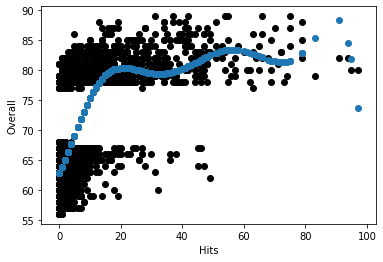

In [31]:
# Implememntando a Plynommial Regression

pr_model3 = LinearRegression()

pr_model3.fit(X_poly3, Y3) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred3 = pr_model3.predict(X_poly3) # Guardando nosso OVERALL em uma nova variável "Y"

# Plotando nosso modelo em nosso dados
plt.scatter(X3, Y3, c="black")
plt.xlabel("Hits")
plt.ylabel("Overall")
plt.scatter(X3, y_pred3)

In [32]:
# Avaliando o nosso modelo através de um root mean square

erro3 = (mean_squared_error(Y3, y_pred3))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²)

Y3_m = [Y3.mean()]*len(Y3)

r_quadrado = 1 - (mean_squared_error(Y3, y_pred3) / mean_squared_error(Y3, Y3_m))

r_quadrado

print("Temos um RootMeanSquare de Treinamento nesse modelo 3 que vale: {0:.5}%".format(erro3))
print("Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 3 que vale: {0:.5}".format(r_quadrado))

Temos um RootMeanSquare de Treinamento nesse modelo 3 que vale: 4.0887%
Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo 3 que vale: 0.48628


In [33]:
pre_process3 = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
X3_teste = dados_teste.hits.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 
Y3_teste = dados_teste.overall.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 

X_poly3_teste = pre_process3.fit_transform(X3_teste) #Transforma nossa variável dependente

# Implememntando a Plynommial Regression

pr_model3 = LinearRegression()

pr_model3.fit(X_poly3_teste, Y3_teste) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_pred3_teste = pr_model3.predict(X_poly3_teste) # Guardando nosso OVERALL em uma nova variável "Y"


In [34]:
# Avaliando o nosso modelo através de um root mean square, no teste

erro3_teste = (mean_squared_error(Y3_teste, y_pred3_teste))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²), no teste

Y3_m_teste = [Y3_teste.mean()]*len(Y3_teste)

r_quadrado_teste = 1 - (mean_squared_error(Y3_teste, y_pred3_teste) / mean_squared_error(Y3_teste, Y3_m_teste))

print("Temos um RootMeanSquare de Teste nesse modelo final que vale: {0:.5}%".format(erro3_teste))
print("Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: {0:.5}".format(r_quadrado_teste))

Temos um RootMeanSquare de Teste nesse modelo final que vale: 2.4058%
Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: 0.1671


<div id="Projeto 2"></div> 

## Logo temos os seguintes dados:

                                        Treinamento     Teste

        Erro(RMS):                        4.87445%      2.4058%

        Coef De determinação(R²):         0.30230       0.1671

Sendo, portanto, a predição não muito semelhante em Testes e Treinamento


<div id="Projeto 2"></div>

## Modelo 4
Prediction feita utilizando 3 variáveis dependentes: Potencial, Idade e Hits.

In [35]:
# Preparando Array com as variáveis dependentes que serão utilizadas

array_P = dados.potential.to_numpy()

array_I = dados.age.to_numpy()

array_H = dados.hits.to_numpy()

Xf = []

for number, element in enumerate(array_P):
    Xf.append([array_P[number], array_I[number], array_H[number]])

Xf = np.array(Xf)

In [36]:
pre_processf = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
  
Yf = dados.overall.to_numpy().reshape(len(dados.hits.to_numpy()), 1) 

X_polyf = pre_processf.fit_transform(Xf) #Transforma nossa variável dependente

X_polyf

array([[1.00000000e+00, 8.90000000e+01, 2.90000000e+01, ...,
        1.99573242e+12, 5.16137695e+12, 1.33483887e+13],
       [1.00000000e+00, 8.90000000e+01, 2.90000000e+01, ...,
        1.05321170e+12, 2.39696455e+12, 5.45516070e+12],
       [1.00000000e+00, 8.90000000e+01, 3.00000000e+01, ...,
        6.24095613e+10, 7.69717923e+10, 9.49318771e+10],
       ...,
       [1.00000000e+00, 6.80000000e+01, 1.80000000e+01, ...,
        3.24000000e+02, 1.80000000e+01, 1.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 2.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.90000000e+01, 1.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
# Implememntando a Plynommial Regression

pr_modelf = LinearRegression()

pr_modelf.fit(X_polyf, Yf) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_predf = pr_modelf.predict(X_polyf) # Guardando nosso OVERALL em uma nova variável "Y"

In [38]:
# CÓDIGO FEITO PARA ROTACIONAR O GRÁFICO


# for angle in range(30,90,10):

#     fig = plt.figure(figsize=(10,10)) # Cria janela da figura

#     # Carrega os eixos
#     ax = fig.gca(projection = "3d")
#     # Cria o gráfico
#     ax.scatter(dados.age, dados.potential, dados.overall, c="black")
#     ax.scatter(dados.age, dados.potential, y_predf)
#     plt.title("Idade X Potencial X Overall")
#     plt.xlabel("Idade")
#     plt.ylabel("Potencial")
#     ax.set_zlabel("Overall")
#     ax.view_init(30, angle) # configura ângulo
#     plt.tight_layout()
#     plt.gca()
#     clear_output(wait=True)

#     plt.show()

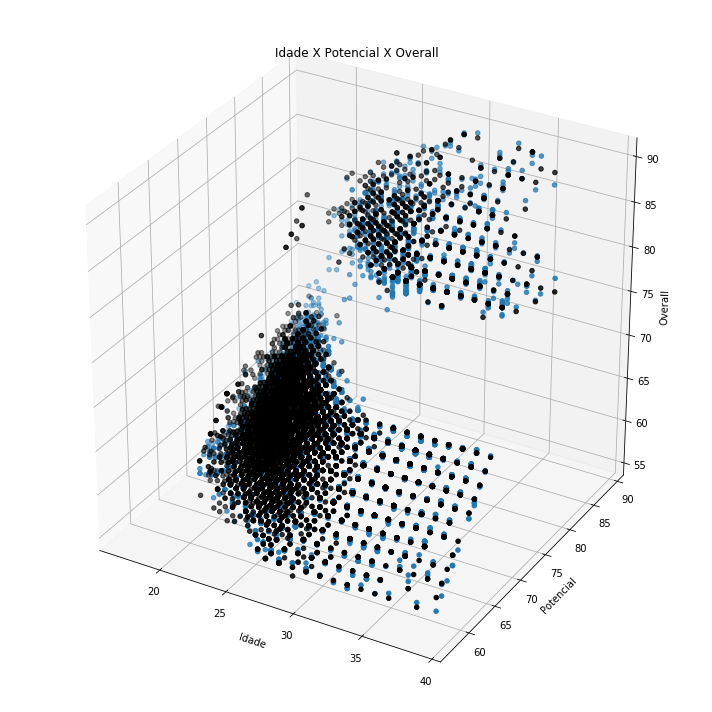

In [39]:
fig = plt.figure(figsize=(10,10))
# Carrega os eixos
ax = fig.gca(projection = "3d")
# Cria o gráfico
ax.scatter(dados.age, dados.potential, dados.overall, c="black")
ax.scatter(dados.age, dados.potential, y_predf)
plt.title("Idade X Potencial X Overall")
plt.xlabel("Idade")
plt.ylabel("Potencial")
ax.set_zlabel("Overall")
plt.tight_layout()

plt.show()

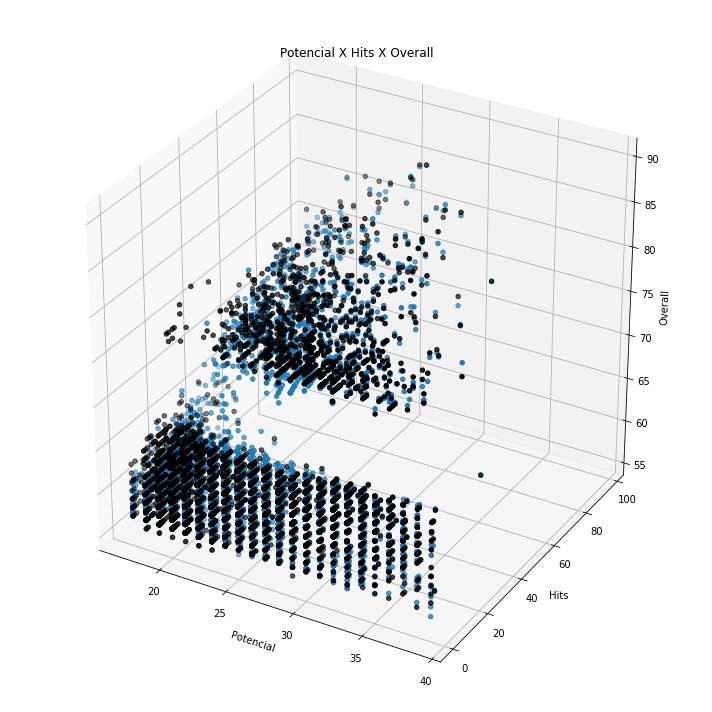

In [40]:
fig = plt.figure(figsize = (10,10))
# Carrega os eixos
ax = fig.gca(projection = "3d")
# Cria o gráfico
ax.scatter(dados.age, dados.hits, dados.overall, c="black")
ax.scatter(dados.age, dados.hits, y_predf)
plt.title("Potencial X Hits X Overall")
plt.xlabel("Potencial")
plt.ylabel("Hits")
ax.set_zlabel("Overall")
plt.tight_layout()


plt.show()

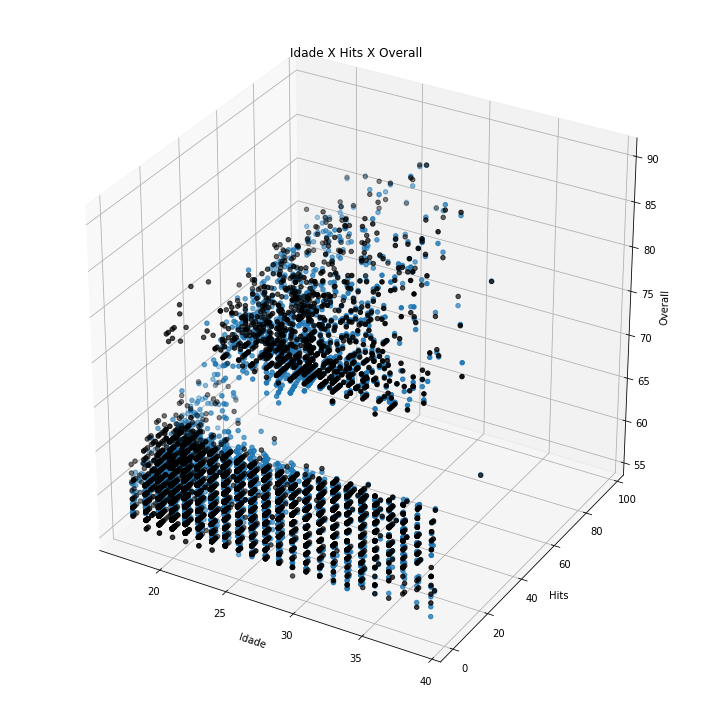

In [41]:
fig = plt.figure(figsize=(10,10))

# Carrega os eixos
ax = fig.gca(projection = "3d")
# Cria o gráfico
ax.scatter(dados.age, dados.hits, dados.overall, c="black")
ax.scatter(dados.age, dados.hits, y_predf)
plt.title("Idade X Hits X Overall")
plt.xlabel("Idade")
plt.ylabel("Hits")
ax.set_zlabel("Overall")
plt.tight_layout()

plt.show()

In [42]:
# Avaliando o nosso modelo através de um root mean square, no treinamento

errof = (mean_squared_error(Yf, y_predf))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²), no treinamento

Yf_m = [Yf.mean()]*len(Yf)

r_quadrado = 1 - (mean_squared_error(Yf, y_predf) / mean_squared_error(Yf, Yf_m))

print("Temos um RootMeanSquare de Treinamento nesse modelo final que vale: {0:.5}%".format(errof))
print("Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo final que vale: {0:.5}".format(r_quadrado))

Temos um RootMeanSquare de Treinamento nesse modelo final que vale: 1.4844%
Temos um Coeficiente de determinação(R²) de Treinamento nesse modelo final que vale: 0.93229


In [43]:
pre_processf = PolynomialFeatures(degree=7) # Definindo PlynomialFeatures e guardando
 
# Preparando Array com as variáveis dependentes que serão utilizadas

array_P = dados_teste.potential.to_numpy()

array_I = dados_teste.age.to_numpy()

array_H = dados_teste.hits.to_numpy()

Xf = []

for number, element in enumerate(array_P):
    Xf.append([array_P[number], array_I[number], array_H[number]])

Xf_teste = np.array(Xf)


Yf_teste = dados_teste.overall.to_numpy().reshape(len(dados_teste.hits.to_numpy()), 1) 

X_polyf_teste = pre_processf.fit_transform(Xf_teste) #Transforma nossa variável dependente

# Implememntando a Plynommial Regression

pr_modelf = LinearRegression()

pr_modelf.fit(X_polyf_teste, Yf_teste) # Ajustando dados pré-processados ao modelo de regressão polinomial

y_predf_teste = pr_modelf.predict(X_polyf_teste) # Guardando nosso OVERALL em uma nova variável "Y"

In [44]:
# Avaliando o nosso modelo através de um root mean square, no teste

errof_teste = (mean_squared_error(Yf_teste, y_predf_teste))**0.5

# Avaliando o nosso modelo através de um coeficiente de determinação(R²), no teste

Yf_m_teste = [Yf_teste.mean()]*len(Yf_teste)

r_quadrado_teste = 1 - (mean_squared_error(Yf_teste, y_predf_teste) / mean_squared_error(Yf_teste, Yf_m_teste))

print("Temos um RootMeanSquare de Teste nesse modelo final que vale: {0:.5}%".format(errof_teste))
print("Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: {0:.5}".format(r_quadrado_teste))

Temos um RootMeanSquare de Teste nesse modelo final que vale: 1.0417%
Temos um Coeficiente de determinação(R²) de Teste nesse modelo final que vale: 0.84383


<div id="Projeto 2"></div>

<div id="Projeto 2"></div> 

## Logo temos os seguintes dados:

                                        Treinamento     Teste

        Erro(RMS):                        1.61662%      1.0421%

        Coef De determinação(R²):         0.92325       0.84372

Sendo, portanto, a predição semelhante em Testes E Treinamento

-------------------------------------------------------------------------------------------------------------------------------

<div id="Projeto 2"></div>

### Storytelling:  
    
        Para conseguir visualizar melhor como esses dados se contextualizam no nosso problema inicial, então imagine uma situação onde voce esta jogando o jogo de futebol FIFA. Tanto no modo campanha quanto no multiplayer, voce terá que eventualmente tomar algumas decisões sobre qual dos seus jogares deverá ser vendido para outro clube ou qual jogador novo deverá comprar para melhorar seu time. 
        Uma maneira que o player tem de ver se o jogador é bom comprar ou vender é pelos status dos mesmo no próprio jogo. Porém se tivesse uma maneira de analisar quanto seria o potencial de crescimento um jogador e sua classificação geral dependendo de outros fatores dele, então não mais ia ser necessário depender do sistema interno do FIFA para classificar um jogador, além de tambem poder apresentar uma oportunidade do player de alterar a classificação de um jogador que queira vender, garantindo um maior lucro em cima daquele mesmo jogador.
        Dessa forma, ao realizar a análise de dados acima e descobrir como certas características de um jogador (como idade, nacionalidade ou sucesso do jogador) estão realcionadas entre si e como elas afetam seu overall e potencial de crescimento, seria então possível não só prever quanto bem um jogador estaria no futuro (então ajudando a decidir se vale ou não comprar ele para melhorar o time), como também seria possivel alterar o potencial de um jogador trabalhando em uma das suas características assim alterando seu valor de mercado e acarretando um possível lucro para o player.
        

-------------------------------------------------------------------------------------------------------------------------------

<div id="Projeto 2"></div>

### Conclusão:
        
        Para analizarmos melhor a relação entre as variáveis observadas (Idade, Hits e Potencial) do jogador e o seu Overall, vamos antes observar os gráficos 2D de cada variável com o Overall e comparar com a análise exploratória feita no inicio do documento. Isso é feito para verificar a precisão do modelo em relação á analise da base de dados. 
        Observando os gráficos 2D do modelo é possível observar que o modelo 1 (idade X overall) tem um coeficiente de determinação muito próximo de zero, assim como o modelo 3 (hits X overall), e o modelo 2 (potencial X overall) tem um coeficiente de determinação mais próximo de 0,4. Ao comparar com os dados obtidos na analise exploratória (presente no heatmap), é possível notar que por mais que tenha uma deferença, existe alguma variavel presente na análise que possa estar influenciando a leitura do nosso modelo. Então chegamos na nossa verificação, que seria de tentar verificar se as variáveis escolhidas (Idade, Hits e Potencial) influenciam o Overall do jogador, ou se tem mais variáveis que possam influenciar, ou até se essas variáveis não tem relação com o Overall.
        Observando os gráficos 3D, do modelo 4, é possivel verificar que a presença de mais uma variável no gráfico mudou bastante a leitura, apresentando uma relação bem melhor do que quando era considerado apenas uma variável. Isso ja é um indicativo que é bem provavel que o Overall do jogador seja, de fato, influenciado por outras variáveis do próprio jogador. Finalmente observando a ultima tabela de dados relacionando as tres variáveis com o Overall do jogador, é possivel então observar um coeficiente de determinação bem próximo de 1. 
        A partir disso podemos concluir que, observando a relação das variáveis individualmente com o Overall do jogador apresentam uma relação menor, já que existem mais variáveis influenciando o Overall. Ja quando observamos todas as tres variáveis desejadas (Idade, Hits e Potencial) juntas com o Overall, é possivel perceber que apresentam uma relação bem maior (possuindo um coeficiente de determinação próximo de 1), indicando que não só essas variáveis escolhidas influenciam bastante o Overall, como que é provavel que n tenham outras variáveis que influenciam significativamente o Overall.
        Sabendo dessa relação, podemos então saber de como é o Overall de um jogador por meio das tres variáveis selecionadas, assim podendo prever se vale a pena comprar um certo jogador no futuro, ou até alterar o valor de mercado de um jogador podendo render um lucro amais para o player. Assim a modelagem pode ser considerada um sucesso em prever o Overall por meio das tres variáveis escolhidas. 

-------------------------------------------------------------------------------------------------------------------------------

<div id="Projeto 2"></div>

### Referências:  
    https://matheusfacure.github.io/2017/02/26/regr-poli/#:~:text=A%20ideia%20%C3%A9%20bastante%20simples,de%20regress%C3%A3o%20linear%20n%C3%A3o%20muda!
    
    http://www.portalaction.com.br/analise-de-regressao/regressao-linear-multipla
    
    https://www.w3schools.com/python/python_ml_polynomial_regression.asp
    
    https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    
    https://medium.com/ai-in-plain-english/implementing-polynomial-regression-in-python-d9aedf520d56
    
    https://dev.to/giselyalves13/visualizacao-de-dados-com-seaborn-2892
    
    https://www.it-swarm-pt.tech/pt/python/barras-de-desvio-padrao-e-erros-na-funcao-tsplot-no-mar-em-python/823130807/amp/